In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import re
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\dell\Desktop\MyDocs\Docs\MK\call_of_duty_reviews_50000.csv")
df

,userName,content,score
0,User101,Best 👌 mobile game ever,5
1,User102,It's a really good game I'm going to rate it 1...,5
2,User103,Call of duty mobile is a very interesting game...,5
3,User104,"I love the game in it's entirety, the only thi...",3
4,User105,Unplayable size.... its portable. Update 2024 ...,1
...,...,...,...
49995,User50096,Good game . The world needs more good games li...,5
49996,User50097,Super,5
49997,User50098,I like this game but i always get out in a mat...,1
49998,User50099,I download it it got 85% then it started to sh...,1


In [3]:
df.head()

,userName,content,score
0,User101,Best 👌 mobile game ever,5
1,User102,It's a really good game I'm going to rate it 1...,5
2,User103,Call of duty mobile is a very interesting game...,5
3,User104,"I love the game in it's entirety, the only thi...",3
4,User105,Unplayable size.... its portable. Update 2024 ...,1


In [4]:
reading_counts = df['score'].value_counts().sort_index()
reading_counts

score
1    11619
2     1000
3     4500
4     2946
5    29935
Name: count, dtype: int64

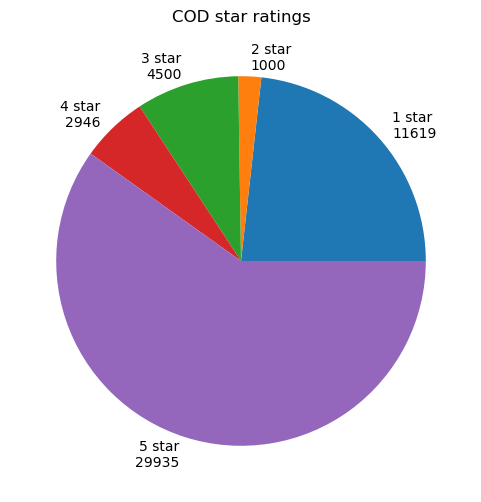

In [5]:
labels = [f"{int(index)} star\n{value}" 
          for index, value in zip(reading_counts.index, reading_counts)]


plt.figure(figsize=(20,6))
plt.title("COD star ratings", fontsize=12)
plt.pie(reading_counts, labels=labels, autopct=None)
plt.show()

In [6]:
df_allReviews = " ".join(review for review in df['content'].astype(str))

In [7]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='viridis').generate(df_allReviews)

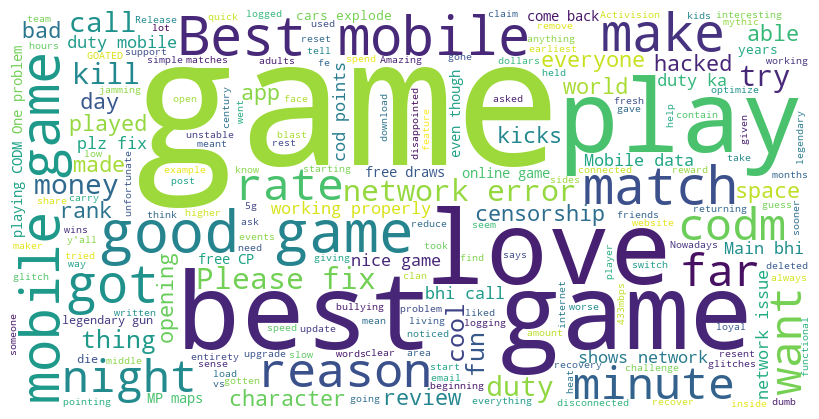

In [8]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [9]:
df_allReviews_cleaned = re.sub(r"[^\w\s]", "", df_allReviews.lower())

In [10]:
split_words = df_allReviews_cleaned.split()
word_counter = Counter(split_words)
most_used_words = word_counter.most_common(10)
print(pd.DataFrame(most_used_words, columns=["Word", "Frequency"]).to_string(index=False))

Word  Frequency
 the      44459
game      39968
   i      31912
  to      24605
  is      23336
 and      23104
   a      20464
  it      20105
this      18410
 but      16892


In [12]:
%pip install langdetect

Note: you may need to restart the kernel to use updated packages.


In [13]:
import langcodes
import nltk
from nltk.corpus import stopwords
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException

In [14]:
DetectorFactory.seed = 0


In [15]:
def detect_language(text):
    try:
        return detect(text)
    except LangDetectException:
        return "unknown"

In [16]:
df['language'] = df['content'].dropna().astype(str).apply(detect_language)

In [17]:
languages_used = df['language'].value_counts()

print("Languages detected in the content section:")
print(languages_used)

Languages detected in the content section:
language
en         36970
so          2500
ar          1000
de          1000
id          1000
tr          1000
af           635
da           500
ru           500
sl           500
unknown      500
no           500
tl           500
fi           500
hr           500
ca           500
nl           500
sw           500
vi           395
Name: count, dtype: int64


In [18]:
languages_used.index

Index(['en', 'so', 'ar', 'de', 'id', 'tr', 'af', 'da', 'ru', 'sl', 'unknown',
       'no', 'tl', 'fi', 'hr', 'ca', 'nl', 'sw', 'vi'],
      dtype='object', name='language')

In [19]:
def get_full_language_name(lang_code):
    try:
        language = langcodes.Language.get(lang_code).display_name()
    except:
        language = lang_code 
    return language

In [20]:
languages_full_names = languages_used.index.map(get_full_language_name)
languages_full_names_list = languages_full_names.tolist()

In [21]:
languages_full_names_list

['English',
 'Somali',
 'Arabic',
 'German',
 'Indonesian',
 'Turkish',
 'Afrikaans',
 'Danish',
 'Russian',
 'Slovenian',
 'unknown',
 'Norwegian',
 'Filipino',
 'Finnish',
 'Croatian',
 'Catalan',
 'Dutch',
 'Swahili',
 'Vietnamese']

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
stopwords_langList = stopwords.fileids()
stopwords_langList

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [24]:
manual_mapping = {
    'Filipino': 'tagalog',  # Filipino is equivalent to Tagalog
    'Slovenian': 'slovene'  # Slovenian is listed as Slovene
}

language_to_stopword_map = {
    lang: manual_mapping.get(lang, lang.lower() if lang.lower() in stopwords_langList else None)
    for lang in languages_full_names_list
}

language_to_stopword_map['Filipino'] = 'Tagalog'
language_to_stopword_map['Slovenian'] = 'Slovene'

common_languages = [
    lang if lang not in ['Filipino', 'Slovenian'] else language_to_stopword_map[lang]
    for lang, stopword_lang in language_to_stopword_map.items() if stopword_lang is not None
]

print(common_languages)

['English', 'Arabic', 'German', 'Indonesian', 'Turkish', 'Danish', 'Russian', 'Slovene', 'Norwegian', 'Tagalog', 'Finnish', 'Catalan', 'Dutch']


In [25]:
def get_most_used_words_by_language(words, languages):
    results = {}
    for lang in languages:
        try:
            # Get stop words for the language
            stop_words = set(stopwords.words(lang.lower()))
            # Filter words
            filtered_words = [word for word in words if word not in stop_words]
            # Count word frequencies
            word_counter = Counter(filtered_words)
            most_used_words = word_counter.most_common(10)
            # Store results
            results[lang] = most_used_words
        except OSError:
            # If no stopwords are found for the language, skip
            print(f"Stopwords not available for language: {lang}")
    return results

In [26]:
language_word_frequencies = get_most_used_words_by_language(split_words, common_languages)

Stopwords not available for language: Tagalog


In [27]:
horizontal_data = {}

for lang, words in language_word_frequencies.items():
    top_words = [f"{word} ({freq})" for word, freq in words[:10]]
    horizontal_data[lang] = top_words + [""] * (10 - len(top_words))

df_horizontal = pd.DataFrame(horizontal_data)

print(df_horizontal.to_string(index=False))

       English       Arabic       German   Indonesian      Turkish       Danish      Russian      Slovene    Norwegian      Finnish      Catalan        Dutch
  game (39968)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)  the (44459)
   best (8351) game (39968) game (39968) game (39968) game (39968) game (39968) game (39968) game (39968) game (39968) game (39968) game (39968) game (39968)
   good (8135)    i (31912)    i (31912)    i (31912)    i (31912)   to (24605)    i (31912)    i (31912)   to (24605)    i (31912)   to (24605)    i (31912)
   like (6392)   to (24605)   to (24605)   to (24605)   to (24605)   is (23336)   to (24605)   is (23336)   is (23336)   to (24605)   is (23336)   to (24605)
   play (6011)   is (23336)   is (23336)   is (23336)   is (23336)  and (23104)   is (23336)  and (23104)  and (23104)   is (23336)  and (23104)  and (23104)
   ever (5590)  and (23104)  and (23104)  and (23104

In [28]:
import emoji

In [29]:
def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

In [30]:
df['Emojis'] = df['content'].apply(extract_emojis)

all_emojis = df['Emojis'].sum()
emoji_counts = Counter(all_emojis)

emoji_df = pd.DataFrame(emoji_counts.items(), columns=["Emoji", "Count"]).sort_values(by="Count", ascending=False)
emoji_df

,Emoji,Count
5,👍,2895
3,🎮,2000
8,♥,2000
27,😭,1395
25,😁,1000
0,👌,500
17,🎆,500
28,😔,500
26,🙂,500
24,✌,500


In [31]:
from textblob import TextBlob

In [32]:
def classify_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Negative"

In [33]:
df['Sentiment'] = df['content'].apply(classify_sentiment)

print("Sample of Reviews with Sentiment Classification:")
print(df[['content', 'score', 'Sentiment']].head(10))

Sample of Reviews with Sentiment Classification:
                                             content  score Sentiment
0                            Best 👌 mobile game ever      5  Positive
1  It's a really good game I'm going to rate it 1...      5  Positive
2  Call of duty mobile is a very interesting game...      5  Positive
3  I love the game in it's entirety, the only thi...      3  Negative
4  Unplayable size.... its portable. Update 2024 ...      1  Negative
5                           STARGAME KUNAL MALHORTRA      5   Neutral
6  account was hacked, support hasn't done anythi...      1  Positive
7  Why my game is not working at night, it showin...      5  Negative
8  Please solve the network errror problem even a...      1   Neutral
9                                           Splendid      5  Positive


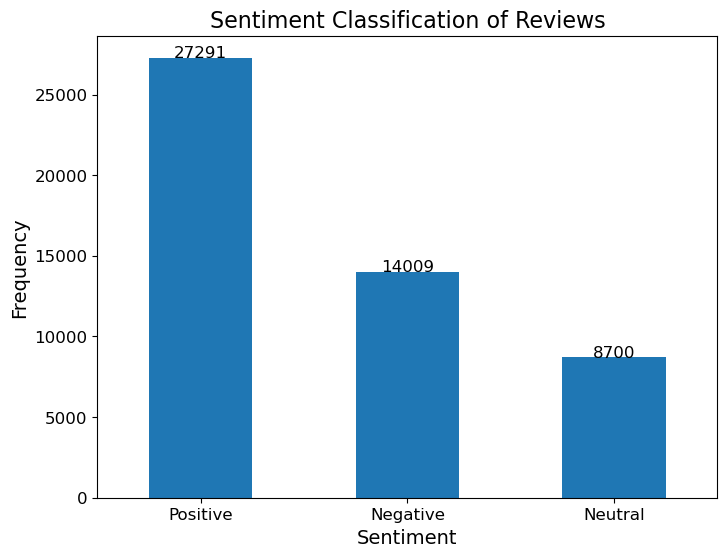

In [34]:
sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')

plt.title("Sentiment Classification of Reviews", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

for i, value in enumerate(sentiment_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12)

plt.show()

In [35]:
if 'Sentiment' not in df.columns:
    df['Sentiment'] = df['content'].apply(classify_sentiment)

In [36]:
sentiment_trends = df.groupby(['score', 'Sentiment']).size().reset_index(name='Count')
sentiment_trends

,score,Sentiment,Count
0,1,Negative,7063
1,1,Neutral,1805
2,1,Positive,2751
3,2,Negative,500
4,2,Neutral,500
5,3,Negative,1000
6,3,Neutral,500
7,3,Positive,3000
8,4,Negative,500
9,4,Neutral,500


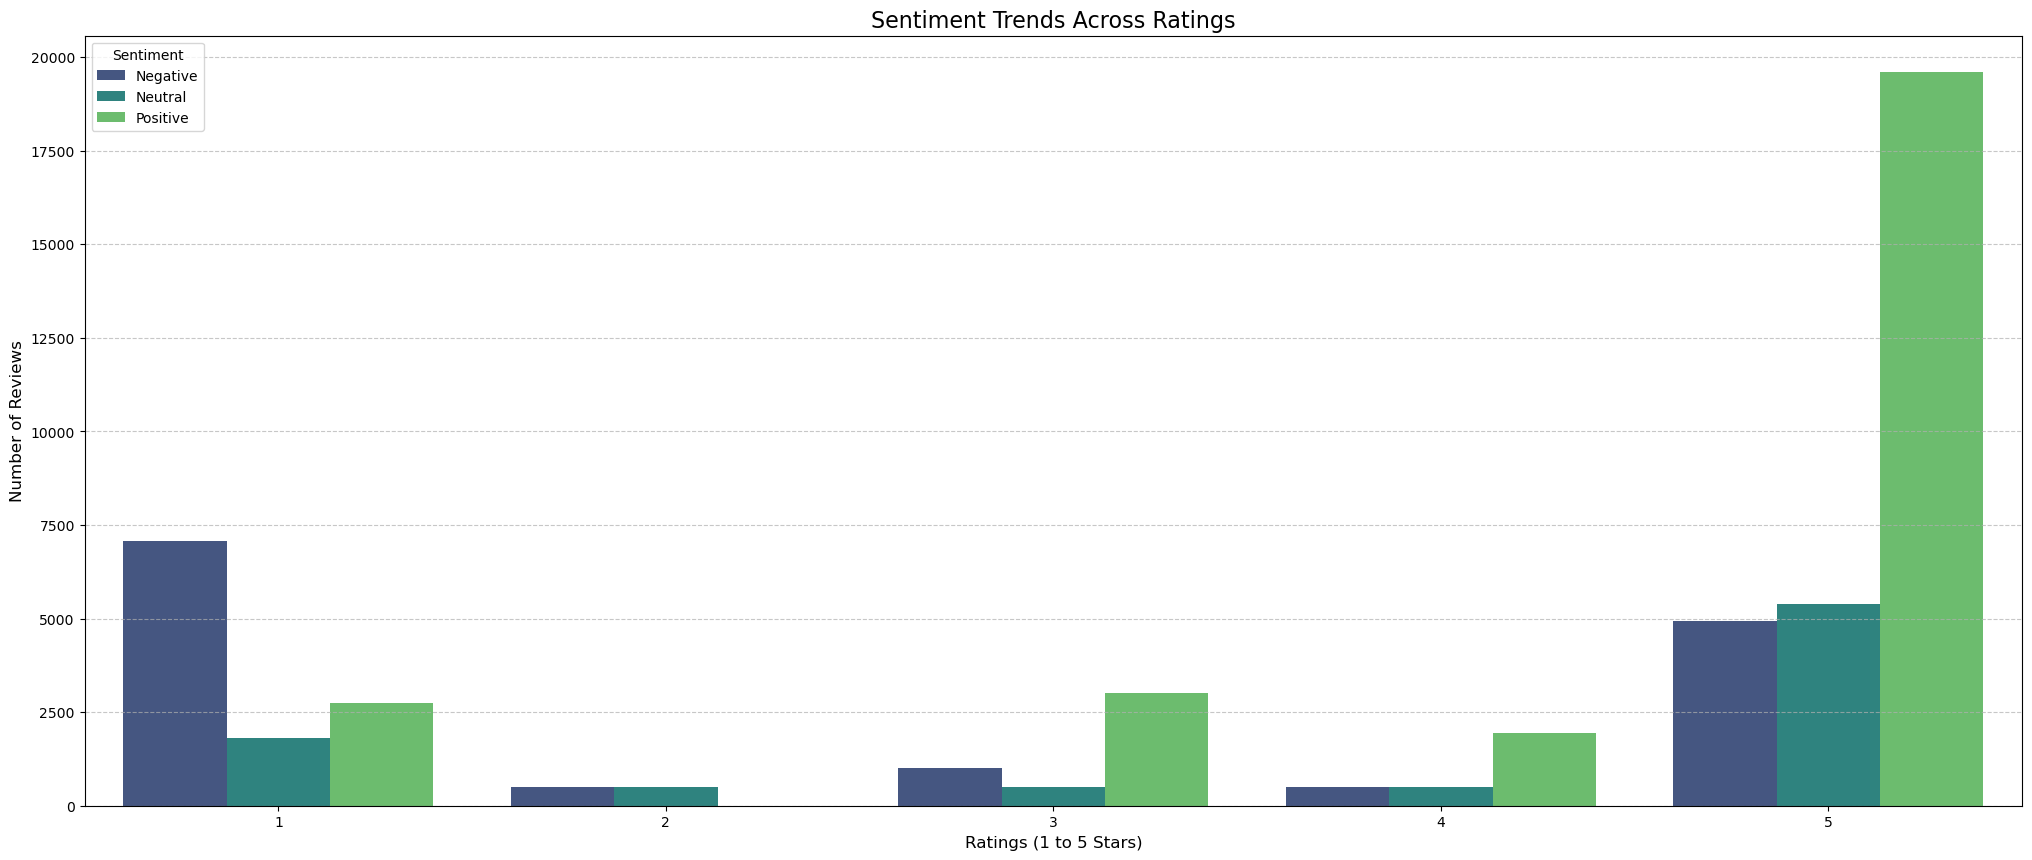

In [37]:
plt.figure(figsize=(25, 10))
sns.barplot(data=sentiment_trends, x='score', y='Count', hue='Sentiment', palette='viridis')
plt.title("Sentiment Trends Across Ratings", fontsize=16)
plt.xlabel("Ratings (1 to 5 Stars)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.legend(title="Sentiment", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()